<a href="https://colab.research.google.com/github/M2kishore/Covid_Detection_using_CT_scans_ML/blob/main/Covid_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from glob import glob
import cv2
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
\from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Enter your path of the dataset location in your drive

In [3]:
%cd /content/drive/MyDrive/Amrita/Semester 6/semester_projects/Machine Learning/Dataset/

/content/drive/MyDrive/Amrita/Semester 6/semester_projects/Machine Learning/Dataset


In [ ]:
%ls


COVID/  feature_extracted.csv  non-COVID/


In [21]:
#define size to which images are to be resized
IMAGE_SIZE = [200, 200] # feel free to change depending on dataset

# training config:
epochs = 500
batch_size = 32

#define paths
covid_path = 'COVID'
noncovid_path = 'non-COVID'

# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

In [5]:
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))
print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))

First 5 Covid Files:  ['COVID/Covid (229).png', 'COVID/Covid (237).png', 'COVID/Covid (1251).png', 'COVID/Covid (182).png', 'COVID/Covid (262).png']
Total Count:  1252
First 5 NonCovid Files:  ['non-COVID/Non-Covid (1161).png', 'non-COVID/Non-Covid (1103).png', 'non-COVID/Non-Covid (1027).png', 'non-COVID/Non-Covid (1038).png', 'non-COVID/Non-Covid (123).png']
Total Count:  1229


In [ ]:
# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]

for i in range(len(covid_files)):
  print(i)
  image = cv2.imread(covid_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per keras
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') #append class label
for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

In [18]:
#lables generation
covid_labels = []
noncovid_labels = []
for i in range(len(covid_files)):
  covid_labels.append("covid")
for i in range(len(covid_files)):
  noncovid_labels.append("noncovid")

In [19]:
files = covid_files + noncovid_files
lables = covid_labels + noncovid_labels
df = pd.DataFrame(list(zip(files, lables)),columns =['Files', 'Lables'])
df = df.sample(frac=1, random_state=42) #shuffle dataset
df.head()


,Files,Lables
254,COVID/Covid (321).png,covid
621,COVID/Covid (587).png,covid
1730,non-COVID/Non-Covid (638).png,noncovid
1792,non-COVID/Non-Covid (594).png,noncovid
819,COVID/Covid (811).png,covid


In [161]:
diss_sim = []
corr = []
homogen = []
energy = []
contrast = []
lables = []
print(df.iloc[6,1]) #get lable of 6th element


covid


In [159]:
from skimage.feature import greycomatrix, greycoprops
from skimage import io
#extract features

def imageextractfeatures(image,lable):
  PATCH_SIZE = 35
  cell_locations = [(25,100),(150,100),(25,150),(25,50),(125,50),(150,50),(125,100),(125,150),(25,25)]
  cell_patches = []
  for loc in cell_locations:
    cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])
  for patch in (cell_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    diss_sim.append(greycoprops(glcm, 'dissimilarity')[0, 0]) #[0,0] to convert array to value
    corr.append(greycoprops(glcm, 'correlation')[0, 0])
    homogen.append(greycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(greycoprops(glcm, 'energy')[0, 0])
    contrast.append(greycoprops(glcm, 'contrast')[0, 0])
    lables.append(lable)
  print(contrast)
  plt.imshow(image, cmap=plt.cm.gray,vmin=0, vmax=255)
  for (x, y) in cell_locations:
    plt.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
  #plt.imshow(image)


covid
[57.61619047619047, 1020.4657142857141, 2812.0000000000023, 3538.4809523809545, 4298.801904761903, 2344.2904761904747, 2547.9219047619044, 4984.223809523807, 428.2952380952385]
covid
[57.61619047619047, 1020.4657142857141, 2812.0000000000023, 3538.4809523809545, 4298.801904761903, 2344.2904761904747, 2547.9219047619044, 4984.223809523807, 428.2952380952385, 57.804761904761904, 1707.6019047619043, 2618.364761904766, 3291.4428571428584, 4029.774285714284, 3081.5257142857126, 3053.2742857142853, 4599.425714285714, 591.3476190476196]
covid
[57.61619047619047, 1020.4657142857141, 2812.0000000000023, 3538.4809523809545, 4298.801904761903, 2344.2904761904747, 2547.9219047619044, 4984.223809523807, 428.2952380952385, 57.804761904761904, 1707.6019047619043, 2618.364761904766, 3291.4428571428584, 4029.774285714284, 3081.5257142857126, 3053.2742857142853, 4599.425714285714, 591.3476190476196, 947.998095238095, 4355.398095238095, 5450.371428571429, 5629.420952380951, 4630.250476190477, 4859.

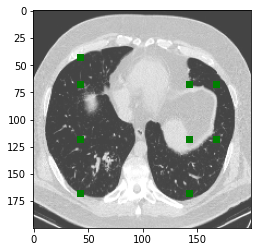

In [162]:
def generateDataFrame():
  for index in range(0,10):
    print(df["Lables"][index])
    image = cv2.imread(df["Files"][index])
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(IMAGE_SIZE[0],IMAGE_SIZE[1]))
    image.resize(IMAGE_SIZE)
    imageextractfeatures(image,df["Lables"][index])
generateDataFrame()

In [166]:
#create dataset
def createDataSet():
  final_dataframe = pd.DataFrame(list(zip(diss_sim, corr,homogen,energy,contrast,lables)),
               columns =['Dissimilarity', 'correlation','homogen','Energy','Contrast','lables'])
  print(final_dataframe.head())
  print(final_dataframe.shape)
createDataSet()


   Dissimilarity  correlation   homogen    Energy     Contrast lables
0       6.002857     0.060181  0.154202  0.058395    57.616190  covid
1      21.983810     0.388447  0.162945  0.123595  1020.465714  covid
2      23.234286     0.559659  0.323045  0.159507  2812.000000  covid
3      31.640952     0.573115  0.257550  0.130624  3538.480952  covid
4      40.952381     0.196996  0.109157  0.049327  4298.801905  covid
(90, 6)


In [11]:
#df.to_csv("feature_extracted.csv")


In [12]:
#df2 = pd.read_csv('https://raw.githubusercontent.com/M2kishore/Covid_Detection_using_CT_scans_ML/main/feature_extracted.csv', header=None)
df2 = pd.read_csv('https://raw.githubusercontent.com/M2kishore/Covid_Detection_using_CT_scans_ML/M2kishore-dataset-with-file-lable/feature_extracted.csv')
df2

,Unnamed: 0,Files,Lables
0,254,COVID/Covid (321).png,covid
1,621,COVID/Covid (587).png,covid
2,1730,non-COVID/Non-Covid (638).png,noncovid
3,1792,non-COVID/Non-Covid (594).png,noncovid
4,819,COVID/Covid (811).png,covid
...,...,...,...
2476,1638,non-COVID/Non-Covid (38).png,noncovid
2477,1095,COVID/Covid (108).png,covid
2478,1130,COVID/Covid (1148).png,covid
2479,1294,non-COVID/Non-Covid (272).png,noncovid
